In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [191]:

df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [193]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

**Genres and Keyword**

Genres and Keywords have the important information and we want to transfer these two into one main string for each movies id, so TF IDF technique can be applied after that.

In [194]:
df['genres'][4] #checking how genres look like

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]'

In [195]:
df['keywords'][1] #checking how keywords look like

'[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]'

It can seen that that genres and keywords are in Json format, so we want to to import json to read this data

In [196]:
import json
def json_to_string(row):
    genr = ' '.join(''.join(i['name'].split()) for i in json.loads(row['genres']))
    keyw = ' '.join(''.join(i['name'].split()) for i in json.loads(row['keywords']))
    return "%s %s" %(genr, keyw)
    

In [197]:
df['main_string'] = df.apply(json_to_string, axis =1)
df['main_string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: main_string, Length: 4803, dtype: object

**TF IDF**

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [199]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['main_string']) #create a data matrix

In [200]:
X

<4803x9789 sparse matrix of type '<class 'numpy.float64'>'
	with 48763 stored elements in Compressed Sparse Row format>

**Recommender**

In this notebook, we gonna use Cosine Similarity approach for the recommender, Cosine Similarity is a measurement that quantifies the similarity between two or more vectors, the cosine similarity is the cosine of the angle between vectors.

In [201]:
movie_idx = pd.Series(df.index, index = df['title'])
movie_idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [214]:
idx = movie_idx['Mortal Kombat']
idx

2100

In [215]:
query = X[idx]
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [216]:
scores = cosine_similarity(query,X)
scores

array([[0.02835352, 0.03157279, 0.01719157, ..., 0.        , 0.        ,
        0.        ]])

In [217]:
scores = scores.flatten()

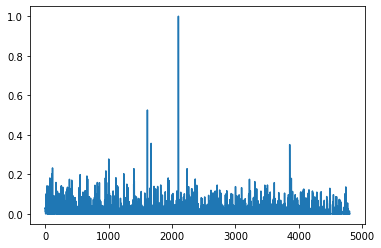

In [218]:
plt.plot(scores)

In [219]:
a = (-scores).argsort()[0:6]

In [220]:
df['title'].iloc[a]

2100                            Mortal Kombat
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
114       Harry Potter and the Goblet of Fire
Name: title, dtype: object

In [227]:
def recomender(movies):
    idx = movie_idx[movies]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
    query = X[idx]
    scores = cosine_similarity(query,X)
    scores = scores.flatten()
    top5 = (-scores).argsort()[1:6]
    return df['title'].iloc[top5]

In [228]:
print("Recommendation for 'Scream 3': " )
print(recomender("Scream 3"))

Recommendation for 'Scream 3': 
4628                          Graduation Day
4053        Friday the 13th: A New Beginning
4048                             The Calling
3902    Friday the 13th Part VI: Jason Lives
895                       Me, Myself & Irene
Name: title, dtype: object


In [229]:
print("Recommendation for 'Motal Kombat': " )
print(recomender('Mortal Kombat'))

Recommendation for 'Motal Kombat': 
1611              Mortal Kombat: Annihilation
1670                       DOA: Dead or Alive
3856              In the Name of the King III
1001    Street Fighter: The Legend of Chun-Li
114       Harry Potter and the Goblet of Fire
Name: title, dtype: object
